<font face="Verdana, cursive, sans-serif" >
<center><H1>Quickly Generate Missing/Invalid Reports with Python scripts</H1></center>

<center><H2><font color='darkred'>How to quickly assess 500+ variables in less than 1 minute?</font></H2></center>

<p>This Python Jupyter Notebooks is a counter-part of <a href="https://github.com/swatakit/SAS-Tools/blob/master/Missing%20Reports%20Notebooks.ipynb"><b>Quickly Generate Missing/Invalid Reports with SAS macros</b></a>.

<H3><font color='darkred'>What is Data Completeness?</font></H3>
<p>Data completeness is one of data quality assessment key metrics. It is basically asking a simple question, how complete is the data? How well is it populated. One simple way to look at it is to measure 'missing/empty' vs. 'not missing'.  However, even 'not missing' does not always mean 'complete'. Take look at this mock up data.
    
<img src="./images/msreport_sample_1.png" >
    
<p>As illustrated, darkred highlighted cells are either 'missing/empty' or 'invalid'. Take <b>EMAIL</b> as an example, if we naively count 'not missing' cells, we would have concluded that <b>EMAIL</b> is 100% populated whereas it is actually 20% populated,(3/15 = 20%). From the above illustrated figure, the summary of %populated of all variables are shown as follows:-
    
<img src="./images/msreport_sample_2.png" >
 
In this program, we demonstrate how to capture the patterns of missing or invalid values with python scripts



<font face="Verdana, cursive, sans-serif" >
<b>Import libraries</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.set(style="ticks", palette="pastel")

<font face="Verdana, cursive, sans-serif" >
<b>Define missing/invalid patterns and function that will be used on <code>DataFramce.appymap</code></b>

In [ ]:
# define missing/invalid patterns 
ch_miss = ['n/a','na','n.a.','n.a','*','-','unknown','email@domain.com','testuser','u','99999999','null','none','c9999','z_error','z_missing']
nm_miss = [99999999.0,-999.0]

# define func for DataFrame.applymap
def set_nan(x):
    if type(x) is str :
        if x.lower() in ch_miss :
            return np.nan
        else:
            return x
    elif x in nm_miss:
         return np.nan
    else:
         return x
        
# generate missing report
def generate_miss_report(data):
    data_dub = data.applymap(set_nan)
    n_miss  = data_dub.isnull().sum() 
    n_miss = n_miss.reset_index()
    p_miss  = data_dub.isnull().sum() / len(data_dub.index)
    p_miss = p_miss.reset_index()
    miss_report = pd.merge(n_miss,p_miss,how='inner',on='index')
    miss_report.columns= ['feature','n_missing','p_missing']
    miss_report['n_populated'] = len(data_dub.index) - miss_report['n_missing']
    miss_report['p_populated'] = 1.0 - miss_report['p_missing']
    return miss_report


<font face="Verdana, cursive, sans-serif" >
<b>Read in SAMPLE data</b>
<p>We can see from below that Python has already set missing values is NaN

In [76]:
data =  pd.read_csv('.\sample_data\sample.csv')
data

,USERID,NAME,GENDER,BIRTHDATE,EFFECTIVEDATE,EXPIRYDATE,PHONE,EMAIL
0,C0001,Abel,M,99999999.0,20140102.0,20140112.0,NaN,n.a
1,C0002,Maggie,F,99999999.0,20140105.0,NaN,NaN,*
2,C0003,John,M,99999999.0,20140107.0,20140125.0,NaN,*
3,C0004,Rose,M,99999999.0,20140107.0,99999999.0,345-466-4467,unknown
4,C0005,Greoge,M,19910116.0,20140108.0,20140205.0,NaN,Greoge@somedomain.com
5,C0006,Luisa,F,20001010.0,20140109.0,20140118.0,NaN,NaN
6,C0007,Carol,U,20011212.0,99999999.0,20140115.0,345-466-2367,email@domain.com
7,C0008,James,U,19701212.0,20140112.0,20140115.0,NaN,email@domain.com
8,C0009,-,U,NaN,NaN,20140121.0,345-466-4467,email@domain.com
9,C0010,-,U,19800725.0,20140115.0,99999999.0,NaN,NaN


In [77]:
miss_report = generate_miss_report(data)

In [78]:
miss_report

,feature,n_missing,p_missing,n_populated,p_populated
0,USERID,2,0.133333,13,0.866667
1,NAME,4,0.266667,11,0.733333
2,GENDER,8,0.533333,7,0.466667
3,BIRTHDATE,9,0.600000,6,0.400000
4,EFFECTIVEDATE,3,0.200000,12,0.800000
5,EXPIRYDATE,4,0.266667,11,0.733333
6,PHONE,10,0.666667,5,0.333333
7,EMAIL,12,0.800000,3,0.200000


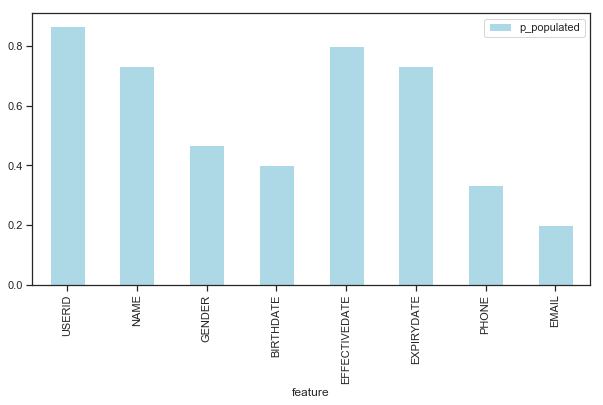

In [79]:
miss_report.plot(kind='bar',x='feature',y='p_populated',color='lightblue')

<font face="Verdana, cursive, sans-serif" >
<H2><font color='darkred'>Read some sample data from <code>SASHELP</code></font></H2>

<p>To learn more about how to connect to SAS in Python/Shell/IDE, please refer to <a href="https://github.com/sassoftware/saspy">SASPY</a>.



In [80]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 10192



In [81]:
data = sas.sasdata('demographics','sashelp')
data.to_df().head(5)

,CONT,ID,ISO,NAME,ISONAME,region,pop,popAGR,popUrban,totalFR,AdolescentFPpct,AdolescentFPyear,AdultLiteracypct,MaleSchoolpct,FemaleSchoolpct,GNI,PopPovertypct,PopPovertyYear
0,91,180,44,BAHAMAS,BAHAMAS,AMR,323063,0.013370,0.900,2.3,NaN,NaN,NaN,0.85,0.88,16140.0,NaN,NaN
1,91,227,84,BELIZE,BELIZE,AMR,269736,0.021354,0.486,3.1,0.125,1998.0,0.769,0.98,1.00,6510.0,NaN,NaN
2,91,260,124,CANADA,CANADA,AMR,32268243,0.008714,0.811,1.5,0.065,1997.0,NaN,1.00,1.00,30660.0,NaN,NaN
3,91,295,188,COSTA RICA,COSTA RICA,AMR,4327228,0.020412,0.617,2.2,0.174,1999.0,0.958,0.90,0.91,9530.0,0.02,2000.0
4,91,300,192,CUBA,CUBA,AMR,11269400,0.003427,0.760,1.6,0.160,2000.0,0.998,0.96,0.95,NaN,NaN,NaN


In [82]:
miss_report = generate_miss_report(data.to_df())

In [83]:
miss_report

,feature,n_missing,p_missing,n_populated,p_populated
0,CONT,0,0.000000,197,1.000000
1,ID,0,0.000000,197,1.000000
2,ISO,0,0.000000,197,1.000000
3,NAME,0,0.000000,197,1.000000
4,ISONAME,0,0.000000,197,1.000000
5,region,0,0.000000,197,1.000000
6,pop,0,0.000000,197,1.000000
7,popAGR,0,0.000000,197,1.000000
8,popUrban,0,0.000000,197,1.000000
9,totalFR,0,0.000000,197,1.000000


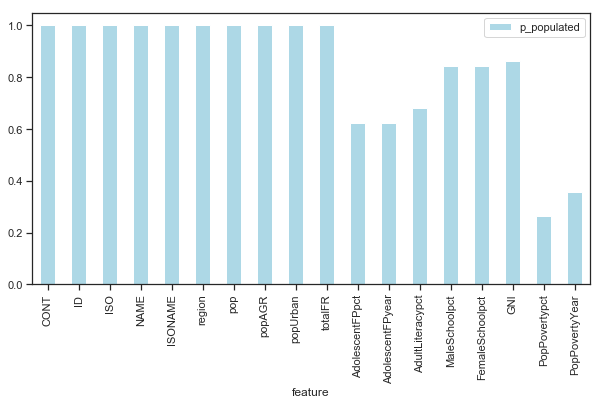

In [84]:
miss_report.plot(kind='bar',x='feature',y='p_populated',color='lightblue')